<a href="https://colab.research.google.com/github/Mirlenis/Data-Science-III/blob/main/Taller_NLP_Mirlenis_Tovar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyMuPDF spacy nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 48.7 MB/s eta 0:00:00


In [9]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import fitz  # PyMuPDF

archivo = "la-casa-de-asterion-borges.pdf"
doc = fitz.open(archivo)

texto = ""
for pagina in doc:
    texto += pagina.get_text()
doc.close()

print(texto[:1000])  # Vista previa del texto extraído

 
Comunicación Oral y Escrita I - II 
 
1
 
 
(1899 - 1986 ) 



“A una tela de 
Watts, pintada en 
1896, 
debo La casa de 
Asterión y el 
carácter del pobre 
protagonista”. 
	








































	
	
	
	

	




 
 
 
 
LA CASA DE ASTERIÓN 
Jorge Luís Borges 
 
Cuento extraído del libro “El Aleph”, 1949. 
 
 
Y la reina dio a luz a un hijo que se llamó Asterión. 
APOLODORO, Biblioteca, III, I 
Sé que me acusan de soberbia, y tal vez de misantropía, y tal vez de locura. Tales 
acusaciones (que yo castigaré a su debido tiempo) son irrisorias. Es verdad que no 
salgo de mi casa, pero también es verdad que sus puertas (cuyo número es infinito)1 
están abiertas día y noche a los hombres y también a los animales. Que entre el que 
quiera. No hallará pompas mujeriles aquí ni el bizarro aparato d


In [11]:
import spacy
from nltk.corpus import stopwords

nlp = spacy.load("es_core_news_sm")
stopwords_es = set(stopwords.words('spanish'))

doc = nlp(texto)

tokens_filtrados = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in stopwords_es]

print(tokens_filtrados[:30])

['comunicación', 'oral', 'escrita', 'i', 'ii', 'tela', 'watts', 'pintada', 'debo', 'casa', 'asterión', 'carácter', 'pobre', 'protagonista', 'casa', 'asterión', 'jorge', 'luís', 'borges', 'cuento', 'extraído', 'libro', 'aleph', 'reina', 'dio', 'luz', 'hijo', 'llamó', 'asterión', 'apolodoro']


In [12]:
import spacy

nlp = spacy.load("es_core_news_sm")
doc_spacy = nlp(texto)

for token in doc_spacy[:30]:
    print(f"Texto: {token.text} | Lemma: {token.lemma_} | POS: {token.pos_}")


Texto:  
 | Lemma:  
 | POS: SPACE
Texto: Comunicación | Lemma: Comunicación | POS: PROPN
Texto: Oral | Lemma: Oral | POS: PROPN
Texto: y | Lemma: y | POS: CCONJ
Texto: Escrita | Lemma: Escrita | POS: PROPN
Texto: I | Lemma: I | POS: CCONJ
Texto: - | Lemma: - | POS: PUNCT
Texto: II | Lemma: II | POS: PROPN
Texto: 
 
 | Lemma: 
 
 | POS: SPACE
Texto: 1 | Lemma: 1 | POS: NUM
Texto: 
 
 
 | Lemma: 
 
 
 | POS: SPACE
Texto: ( | Lemma: ( | POS: PUNCT
Texto: 1899 | Lemma: 1899 | POS: NOUN
Texto: - | Lemma: - | POS: PUNCT
Texto: 1986 | Lemma: 1986 | POS: NOUN
Texto: ) | Lemma: ) | POS: PUNCT
Texto: 
 | Lemma: 
 | POS: SPACE
Texto:  | Lemma:  | POS: DET
Texto: 
 | Lemma: 
 | POS: SPACE
Texto:  | Lemma:  | POS: DET
Texto: 
 | Lemma: 
 | POS: SPACE
Texto:  | Lemma:  | POS: DET
Texto: 
 | Lemma: 
 | POS: SPACE
Texto: “ | Lemma: “ | POS: PROPN
Texto: A | Lemma: A | POS: ADP
Texto: una | Lemma: uno | POS: DET
Texto: tela | Lemma: tela | POS: NOUN
Texto: de | Lemma: de | POS: ADP
Texto: 
 | Le

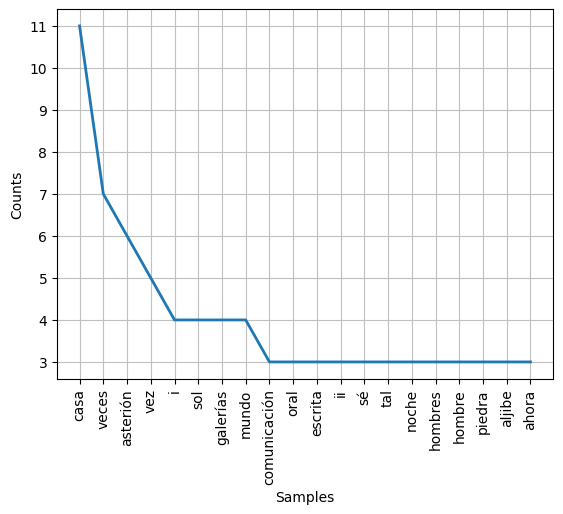

In [13]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Asumiendo que tokens_filtrados ya está definido (lista de palabras limpias)
fdist = FreqDist(tokens_filtrados)

# Mostramos las 20 palabras más comunes
fdist.plot(20, cumulative=False)
plt.show()

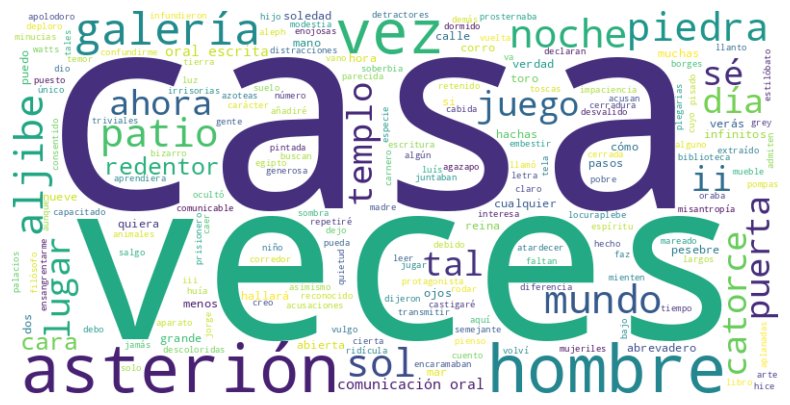

In [14]:
from wordcloud import WordCloud

# Unimos tokens en un solo texto para la nube
texto_para_nube = " ".join(tokens_filtrados)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_para_nube)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
import spacy
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt

nlp = spacy.load("es_core_news_sm")
stopwords_es = set(stopwords.words('spanish'))

def procesar_texto(texto):
    doc = nlp(texto)
    tokens_filtrados = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in stopwords_es]

    print("Tokens filtrados:", tokens_filtrados[:30])

    print("\nLematización y POS tagging de las primeras 30 palabras:")
    for token in doc[:30]:
        print(f"{token.text} | {token.lemma_} | {token.pos_}")

    # Gráfico frecuencia
    fdist = FreqDist(tokens_filtrados)
    fdist.plot(20, cumulative=False)
    plt.show()

    return tokens_filtrados


Tokens filtrados: ['casa', 'asterión', 'cuento', 'interesante']

Lematización y POS tagging de las primeras 30 palabras:
La | el | DET
casa | casa | NOUN
de | de | ADP
Asterión | Asterión | PROPN
es | ser | AUX
un | uno | DET
cuento | cuento | NOUN
muy | mucho | ADV
interesante | interesante | ADJ
. | . | PUNCT


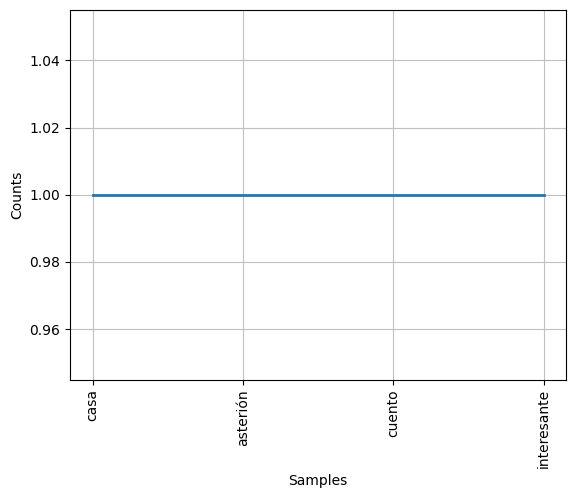

Tokens filtrados: ['aprendiendo', 'análisis', 'datos', 'nlp', 'python']

Lematización y POS tagging de las primeras 30 palabras:
Estoy | estar | AUX
aprendiendo | aprender | VERB
análisis | análisis | NOUN
de | de | ADP
datos | dato | NOUN
y | y | CCONJ
NLP | NLP | PROPN
con | con | ADP
Python | Python | PROPN
. | . | PUNCT


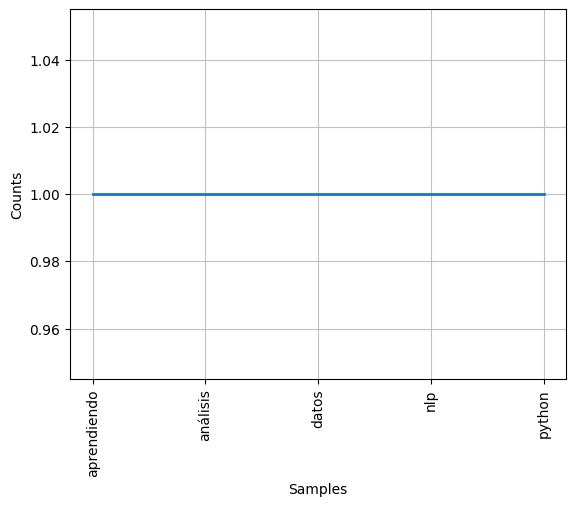

Tokens filtrados: ['señor', 'pastor', 'faltará']

Lematización y POS tagging de las primeras 30 palabras:
El | el | DET
Señor | Señor | PROPN
es | ser | AUX
mi | mi | DET
pastor | pastor | NOUN
; | ; | PUNCT
nada | nada | PRON
me | yo | PRON
faltará | faltar | VERB
. | . | PUNCT


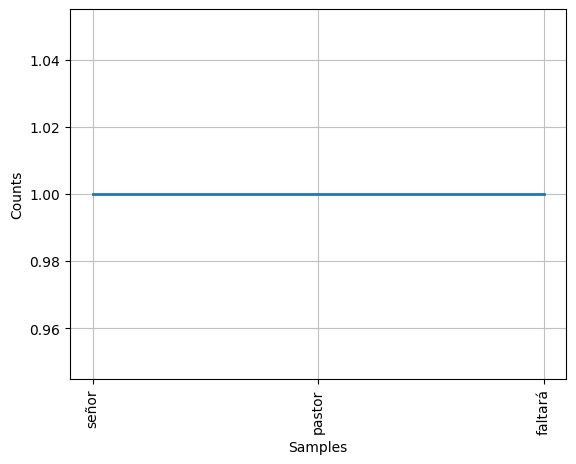

['señor', 'pastor', 'faltará']

In [18]:
texto1 = "La casa de Asterión es un cuento muy interesante."
texto2 = "Estoy aprendiendo análisis de datos y NLP con Python."
texto3 = "El Señor es mi pastor; nada me faltará."

procesar_texto(texto1)
procesar_texto(texto2)
procesar_texto(texto3)

In [15]:
with open("tokens_limpios.txt", "w", encoding="utf-8") as f:
    for token in tokens_filtrados:
        f.write(token + "\n")

In [16]:
import pandas as pd

df = pd.DataFrame(tokens_filtrados, columns=["token"])
df.to_csv("tokens_limpios.csv", index=False, encoding="utf-8")